In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/oneDrive/Desktop/AI/New Zeolite/Channel/Channel-Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1328, 16)

In [3]:
A=df['Ge/Si']
B=df["Al/T"]
C = df['OH/T']
D = df['H2O/T']
E = df["F/T"]
F=df['OSDA/T']
G=df["B/T"]
H = df['Na2O/T']
I = df['Cl/T']
J=df['Temperature']
K=df["time"]
L = df['AR']
M=df['Area']
N= df['C/N']
O= df['rpm']
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(1328, 15)

In [4]:
X_OS=List1
Y_OS=df["Classification"]

train accuracy 0.9958165992639343
test accuracy 0.9337149692412849
train precision 0.9901715258287304
test precision 0.8985886523478275
train recall 0.9977895952979212
test recall 0.884464700405187
train f1 0.9939335101119073
test f1 0.8830947049534468
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00        57
           2       0.99      1.00      1.00       166
           3       0.98      1.00      0.99       150

    accuracy                           1.00      1196
   macro avg       0.99      1.00      1.00      1196
weighted avg       1.00      1.00      1.00      1196

test               precision    recall  f1-score   support

           0       0.97      0.92      0.94        91
           1       0.75      1.00      0.86         6
           2       0.90      0.95      0.92        19
           3       0.82      0.88      0.85        16

    accuracy                 

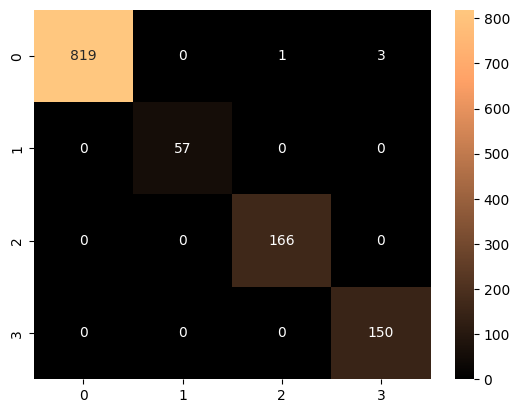

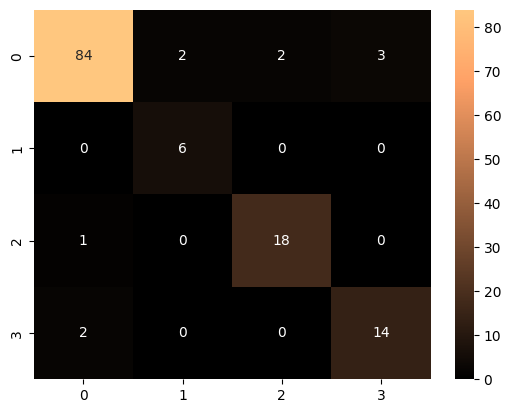

In [5]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RF=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1, n_estimators=690,)
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmc_RF.append(mmc)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient',mean(mmc_RF))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9958165992639343
test accuracy 0.9337263613579403
train precision 0.9897624740343092
test precision 0.8935541232395752
train recall 0.9982067657668656
test recall 0.8999995598339081
train f1 0.9939373883614915
test f1 0.8928702426931234
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00        57
           2       0.99      1.00      1.00       166
           3       0.99      0.99      0.99       150

    accuracy                           1.00      1196
   macro avg       0.99      1.00      1.00      1196
weighted avg       1.00      1.00      1.00      1196

test               precision    recall  f1-score   support

           0       0.94      0.92      0.93        91
           1       0.56      0.83      0.67         6
           2       0.90      0.95      0.92        19
           3       0.93      0.81      0.87        16

    accuracy                

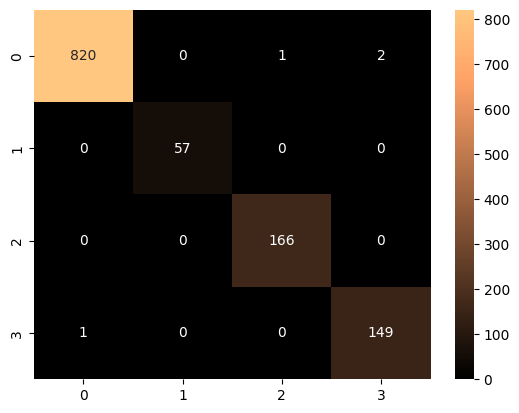

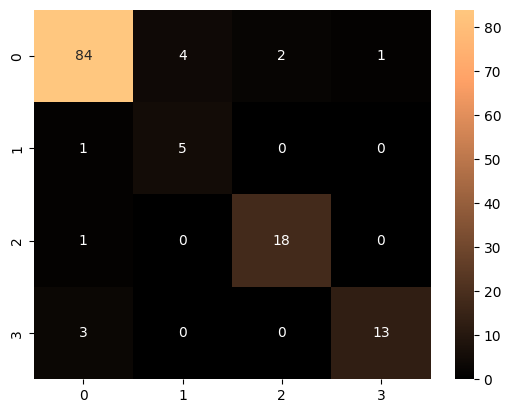

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
GB = GradientBoostingClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, n_estimators=800,
                                learning_rate=0.09, min_samples_split=5 )                             
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_gb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient',mean(mmc_gb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.9590028127230237
test accuracy 0.9276999316473
train precision 0.9328305682879938
test precision 0.8899522294418393
train recall 0.9328131121531195
test recall 0.8800947170659615
train f1 0.932625600042256
test f1 0.8803174028360843
train               precision    recall  f1-score   support

           0       0.97      0.97      0.97       823
           1       0.88      0.89      0.89        57
           2       0.96      0.95      0.96       166
           3       0.94      0.94      0.94       150

    accuracy                           0.96      1196
   macro avg       0.94      0.94      0.94      1196
weighted avg       0.96      0.96      0.96      1196

test               precision    recall  f1-score   support

           0       0.96      0.90      0.93        91
           1       0.60      1.00      0.75         6
           2       0.94      0.89      0.92        19
           3       0.79      0.94      0.86        16

    accuracy                    

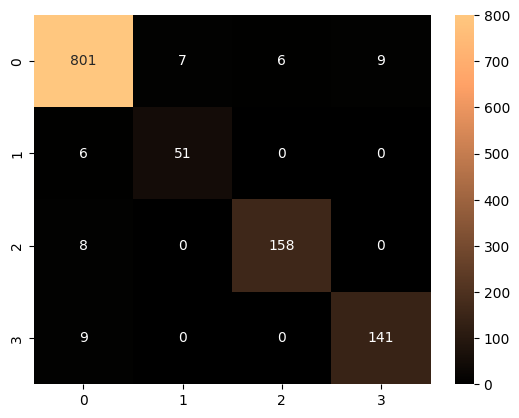

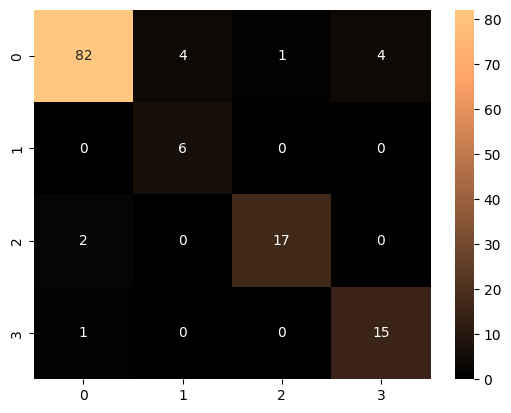

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1,  alpha=1, max_depth=5, gamma=1, learning_rate=0.59 )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_xgb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient',mean(mmc_xgb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


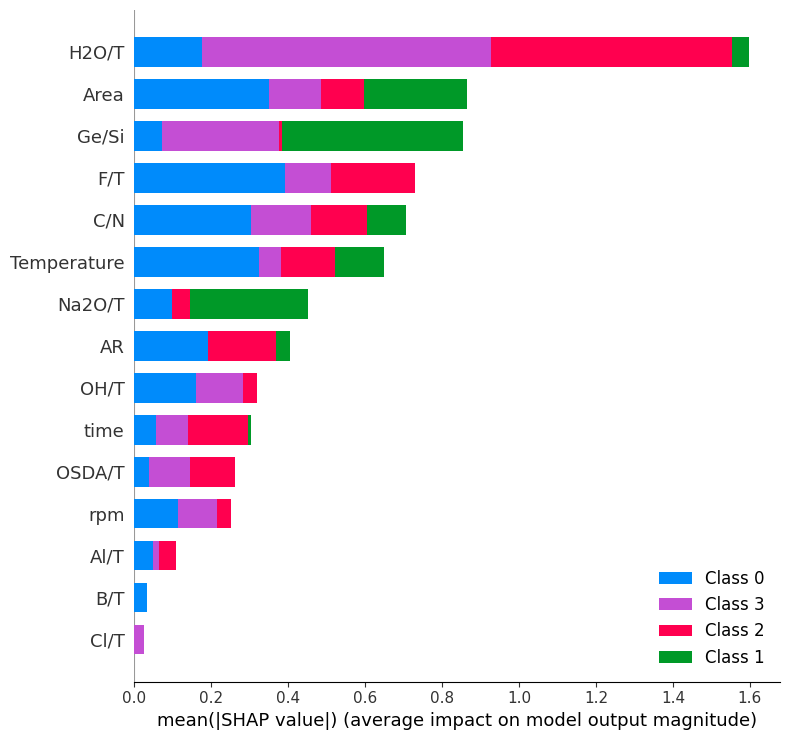

In [12]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

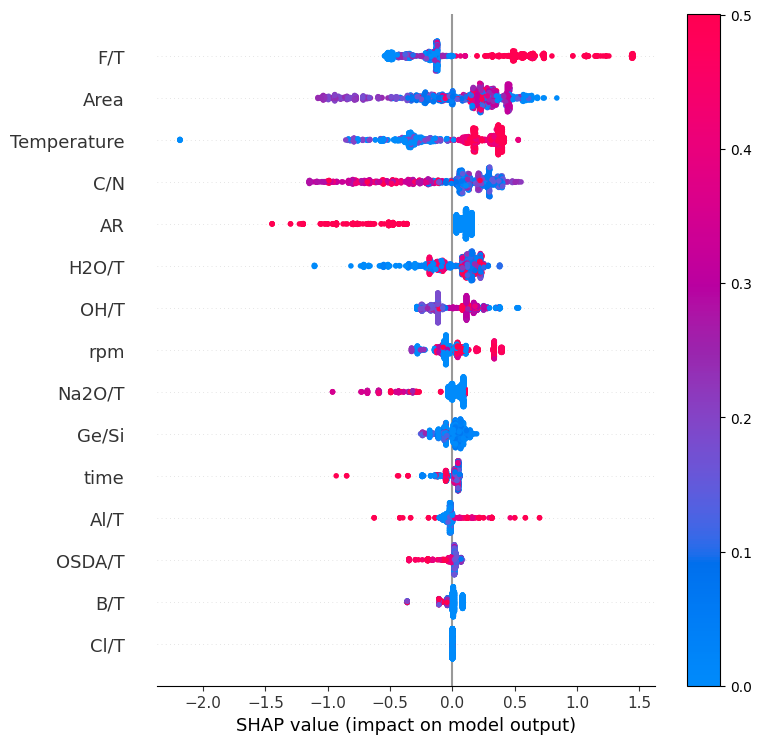

In [14]:
shap.summary_plot(shap_values_XGB[0], X_Train, show = False, color_bar = False,)
plt.colorbar()

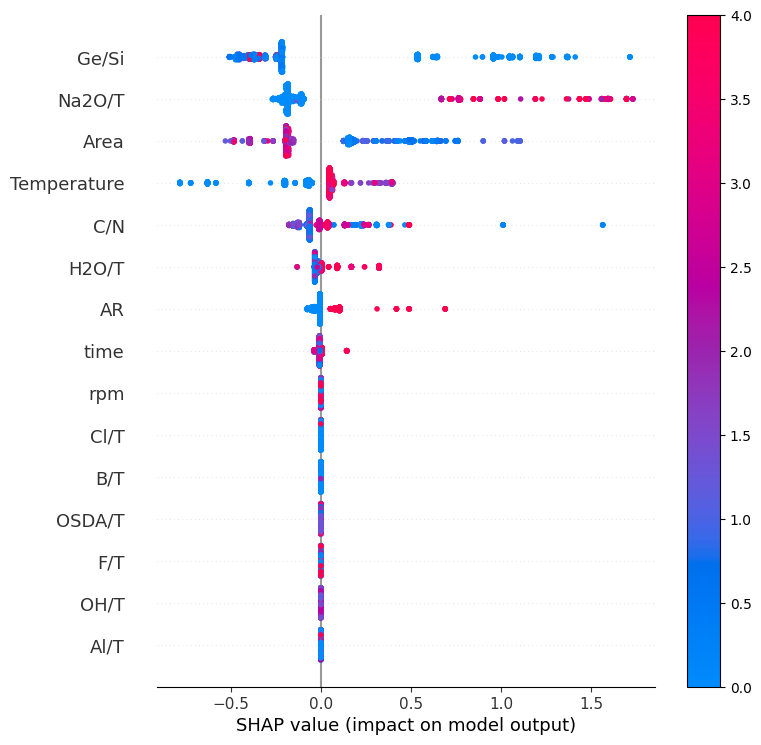

In [15]:
shap.summary_plot(shap_values_XGB[1], X_Train, show = False, color_bar = False,)
plt.colorbar()

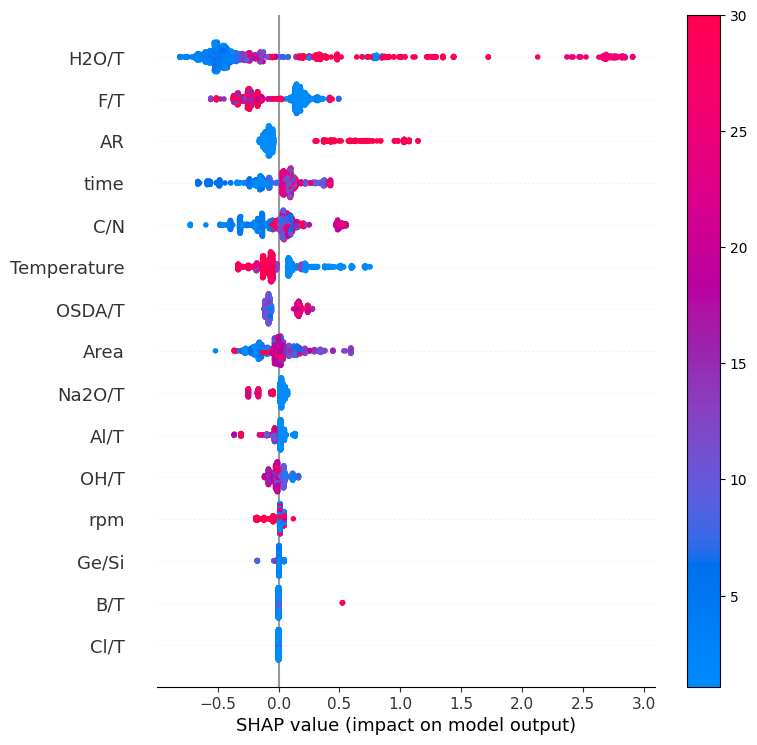

In [16]:
shap.summary_plot(shap_values_XGB[2], X_Train, show = False, color_bar = False,)
plt.colorbar()

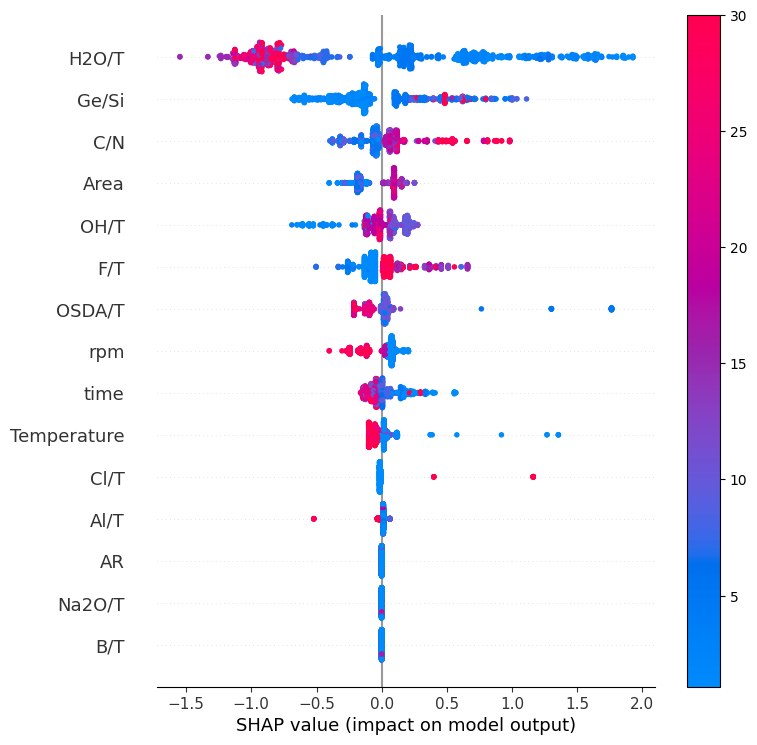

In [17]:
shap.summary_plot(shap_values_XGB[3], X_Train, show = False, color_bar = False,)
plt.colorbar()

train accuracy 0.9958165992639343
test accuracy 0.9291922989291411
train precision 0.9984899347078111
test precision 0.8955468159570692
train recall 0.9893033148034636
test recall 0.872828822971423
train f1 0.99384156375579
test f1 0.8746290323495621
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00        57
           2       1.00      0.99      1.00       166
           3       1.00      0.98      0.99       150

    accuracy                           1.00      1196
   macro avg       1.00      0.99      1.00      1196
weighted avg       1.00      1.00      1.00      1196

test               precision    recall  f1-score   support

           0       0.97      0.92      0.94        91
           1       0.71      0.83      0.77         6
           2       0.90      0.95      0.92        19
           3       0.83      0.94      0.88        16

    accuracy                   

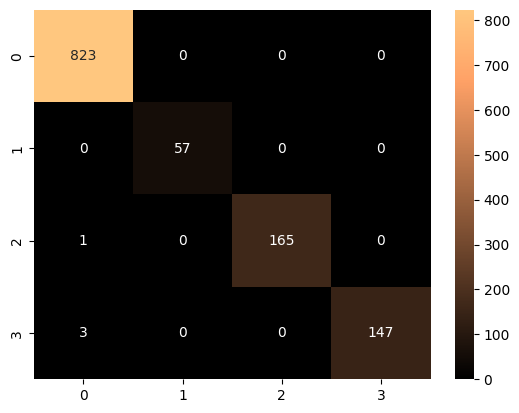

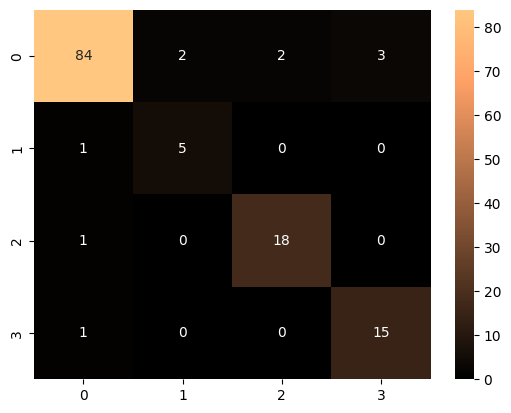

In [18]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_et=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, n_estimators=800)
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_et.append(mmc)
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient',mean(mmc_et))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9417667678873791
test accuracy 0.8930849851902483
train precision 0.9089704650387705
test precision 0.8348982409917337
train recall 0.8955149114260557
test recall 0.814912053684937
train f1 0.9005660661101214
test f1 0.8149046729974551
train               precision    recall  f1-score   support

           0       0.97      0.95      0.96       823
           1       0.78      0.75      0.77        57
           2       0.88      0.96      0.92       166
           3       0.90      0.95      0.93       150

    accuracy                           0.94      1196
   macro avg       0.88      0.90      0.89      1196
weighted avg       0.94      0.94      0.94      1196

test               precision    recall  f1-score   support

           0       0.94      0.89      0.92        91
           1       0.55      1.00      0.71         6
           2       0.85      0.89      0.87        19
           3       0.80      0.75      0.77        16

    accuracy                 

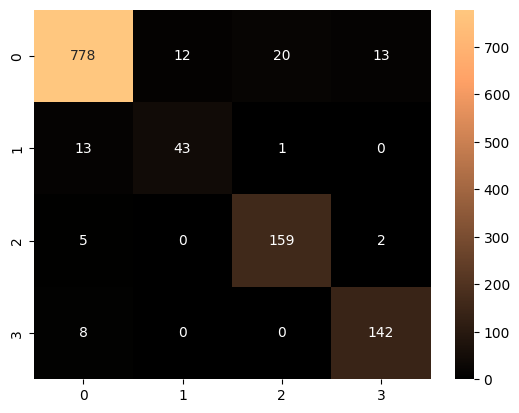

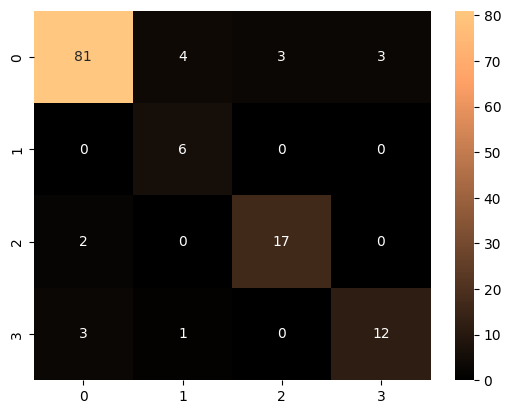

In [19]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dt=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1, splitter = "random",
                          criterion ="entropy", min_samples_leaf=3 )
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dt.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient',mean(mmc_dt))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



In [20]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

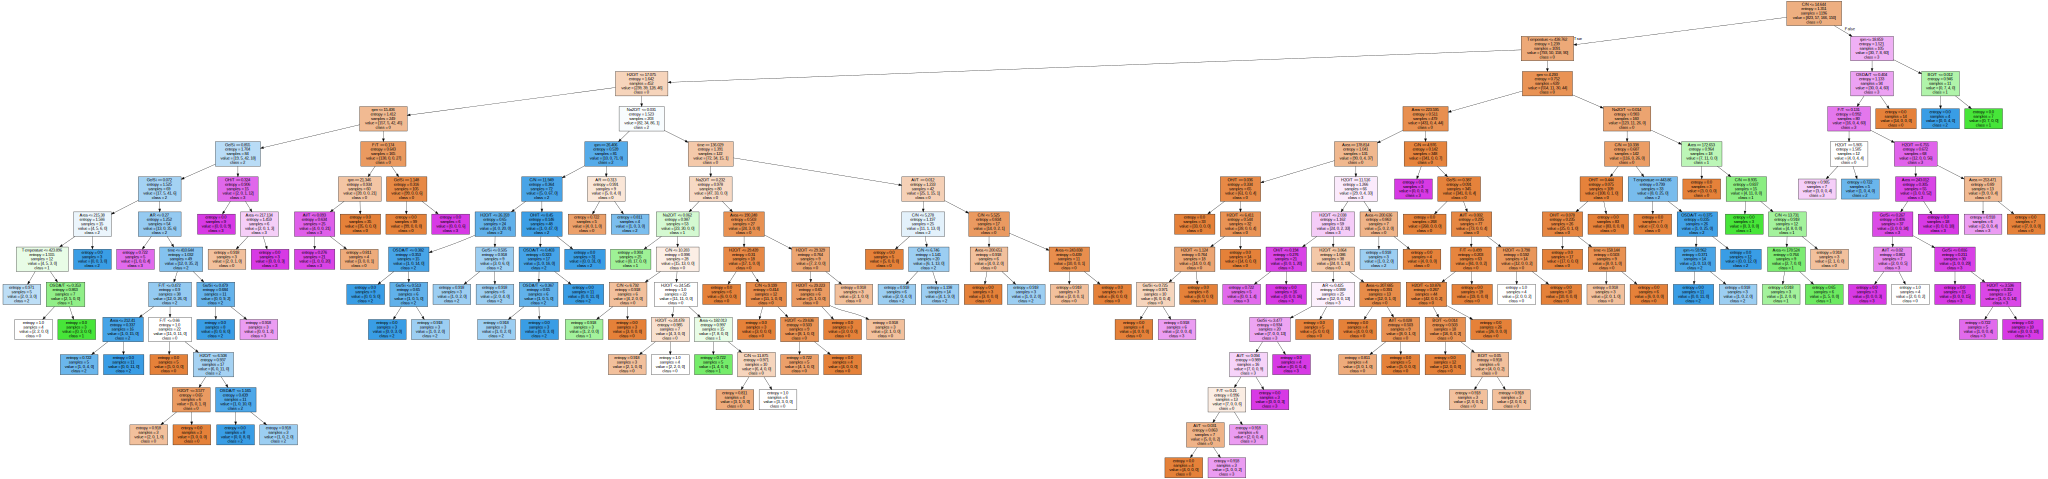

In [21]:
fn=["Ge/Si", "Al/T", "OH/T","H2O/T","F/T", "OSDA/T", 
    "BO/T","Na2O/T", "Cl/T", "Temperature", "time","AR", "Area","C/N","rpm"]
cn=["0", "1", "2", "3"]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 

In [22]:
graph.render("DTChannelno oversample")


'DTChannelno oversample.png'